In [6]:
import pandas as pd
#IMPORTING THE DATA
results_demos_pollingarea=pd.read_csv("data/results_demos_pollingarea.csv")

#Reducing dataset to specific region
#results_demos_pollingarea=results_demos_pollingarea[results_demos_pollingarea["region_name"]=="Hovedstaden"]

results_demos_pollingarea=results_demos_pollingarea.drop(columns=['A', 'B', 'C', 'D', 'SF',
       'I', 'K', 'O', 'Q', 'OE', 'Alt', 'other','eligible', 'voted', 'municipality', 'district', 'nom_district', 'region',
       'pollingarea_name', 'mun_name', 'district_name', 'nom_district_name',
       'region_name']).set_index("pollingarea_id",drop=True)
results_2019=pd.read_csv("data/results_2019.csv",sep=";").drop(columns=['voted', 'eligible','A', 'C', 'SF',
       'I', 'B', 'K', 'O', 'OE', 'Alt', 'D', 'other']).set_index("pollingarea_id",drop=True)
demos_municipality=pd.read_csv("data/demos_municipality.csv")

#CLEANING THE DATA
#Make parties relative
for p in ["V","M","AE"]:
    for df in [results_demos_pollingarea,results_2019]:
        if p in list(df.columns):
            df[p]=df[p]/df["valid"]

#Making relative to people
people_rel=['age_0_17', 'age_18_29', 'age_30_39',
       'age_40_49', 'age_50_59', 'age_60_69', 'age_70_older', 'men', 'women',
       'danes', 'immig', 'unemployed', 'retired', 'church_member',
       'not_church_member']
for col in people_rel:
    results_demos_pollingarea[col]=results_demos_pollingarea[col]/results_demos_pollingarea["n_people"]

#Making relative to households
household_rel=['income_100000_149999',
       'income_150000_199999', 'income_200000_299999', 'income_300000_399999',
       'income_400000_499999', 'income_500000_749999', 'income_over_750000',
       'housholds_with car']
for col in household_rel:
    results_demos_pollingarea[col]=results_demos_pollingarea[col]/results_demos_pollingarea["n_households"]


#Creating polulation features
results_demos_pollingarea["dwelling_density"]=results_demos_pollingarea["n_people"]/results_demos_pollingarea["n_households"]
results_demos_pollingarea["polling_size"]=results_demos_pollingarea["n_people"]/results_demos_pollingarea["n_people"].sum()
results_demos_pollingarea=results_demos_pollingarea.drop(columns=["n_people","n_households"])

#JOINING THE DATA
df=results_demos_pollingarea.join(results_2019[["V"]],rsuffix="_19").drop(columns="valid")

In [7]:
df

,M,V,AE,age_0_17,age_18_29,age_30_39,age_40_49,age_50_59,age_60_69,age_70_older,...,income_150000_199999,income_200000_299999,income_300000_399999,income_400000_499999,income_500000_749999,income_over_750000,housholds_with car,dwelling_density,polling_size,V_19
pollingarea_id,,,,,,,,,,,,,,,,,,,,,
101001,0.111320,0.098603,0.008651,0.165339,0.260185,0.166495,0.131089,0.121514,0.074862,0.080517,...,0.059371,0.153342,0.127130,0.117693,0.202490,0.308781,0.391612,2.039581,0.002673,0.179013
101002,0.121148,0.124443,0.016476,0.167820,0.219862,0.153020,0.125209,0.118644,0.089162,0.126283,...,0.058054,0.174637,0.133952,0.116583,0.181537,0.306210,0.455389,1.993338,0.001439,0.204433
101003,0.106389,0.087391,0.008699,0.192225,0.225230,0.162060,0.140288,0.127793,0.079578,0.072826,...,0.053688,0.140446,0.112218,0.094230,0.206033,0.357410,0.420091,2.192611,0.002722,0.159790
101005,0.098944,0.077830,0.013365,0.155292,0.265107,0.180333,0.114230,0.104832,0.081052,0.099155,...,0.076283,0.187508,0.128632,0.119928,0.201075,0.251504,0.385895,2.029182,0.002723,0.141039
101006,0.102919,0.078384,0.014217,0.166901,0.259509,0.172462,0.121228,0.111218,0.076815,0.091866,...,0.061142,0.188496,0.138076,0.114170,0.201970,0.263547,0.399305,1.954071,0.002316,0.154743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860022,0.047132,0.143175,0.195198,0.197923,0.110612,0.098540,0.114542,0.138125,0.145143,0.195115,...,0.062176,0.242948,0.158319,0.104778,0.194013,0.222798,0.747265,2.050662,0.000612,0.316930
860023,0.078103,0.149233,0.196653,0.213435,0.124150,0.103741,0.153912,0.155612,0.116497,0.132653,...,0.040816,0.132653,0.144898,0.116327,0.259184,0.302041,0.912245,2.400000,0.000202,0.346753
860026,0.040789,0.138158,0.222368,0.168186,0.110191,0.083679,0.141674,0.188070,0.183927,0.124275,...,0.049470,0.219081,0.157244,0.109541,0.212014,0.236749,0.835689,2.132509,0.000207,0.290488


In [8]:
df.columns

Index(['M', 'V', 'AE', 'age_0_17', 'age_18_29', 'age_30_39', 'age_40_49',
       'age_50_59', 'age_60_69', 'age_70_older', 'men', 'women', 'danes',
       'immig', 'unemployed', 'retired', 'church_member', 'not_church_member',
       'income_100000_149999', 'income_150000_199999', 'income_200000_299999',
       'income_300000_399999', 'income_400000_499999', 'income_500000_749999',
       'income_over_750000', 'housholds_with car', 'dwelling_density',
       'polling_size', 'V_19'],
      dtype='object')

In [69]:
#Data Categories
data_cats={
    "families":['age_0_17'],
    "age":['age_18_29', 'age_30_39', 'age_40_49','age_50_59', 'age_60_69', 'age_70_older'],
    "gender":['women','men'],
    "etnicity":['danes','immig'],
    "socioeconomy":['unemployed', 'retired'],
    "church":['not_church_member'],
    "income":['income_100000_149999', 'income_150000_199999', 'income_200000_299999',
       'income_300000_399999', 'income_400000_499999', 'income_500000_749999',
       'income_over_750000'],
}

means={
    "age":{'age_18_29':23, 'age_30_39':34, 'age_40_49':44,'age_50_59':54, 'age_60_69':64, 'age_70_older':75},
    "income":{'income_100000_149999':125000, 'income_150000_199999':175000, 'income_200000_299999':250000,
       'income_300000_399999':350000, 'income_400000_499999':450000, 'income_500000_749999':612500,
       'income_over_750000':800000},
    "gender":{'women':0,'men':1}
}


Text(0.5, 0, 'Gender')

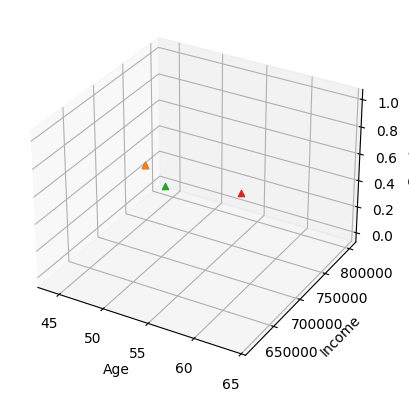

In [72]:
import matplotlib.pyplot as plt

parties=["V_19","V","M","AE"]
categories=["age","income","gender"]
df_=pd.DataFrame(columns=["party"]+categories).set_index("party")

for category in categories:
    corr = df.corr()[parties].loc[data_cats[category]]
    for party in parties:
        df_.loc[party,category]=means[category][corr[party].idxmax()]
        
# sns.scatterplot(data=df_.reset_index(), x="age", y="income", hue="party")
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for party in parties:
    xs = df_.loc[party,"age"]
    ys = df_.loc[party,"income"]
    zs = df_.loc[party,"gender"]
    ax.scatter(xs, ys, zs, marker="^")

ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Gender')

In [73]:
df_

,age,income,gender
party,,,
V_19,54,612500,1
V,54,612500,1
M,44,800000,0
AE,64,612500,1
